In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

from importlib import reload
import classif_output_structs as cos
#from classif_output_structs import Epoch, ComboEpoch, Run, Series, Collection
cos = reload(cos)


/home/sbatchelder/.conda/envs/dataproc/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


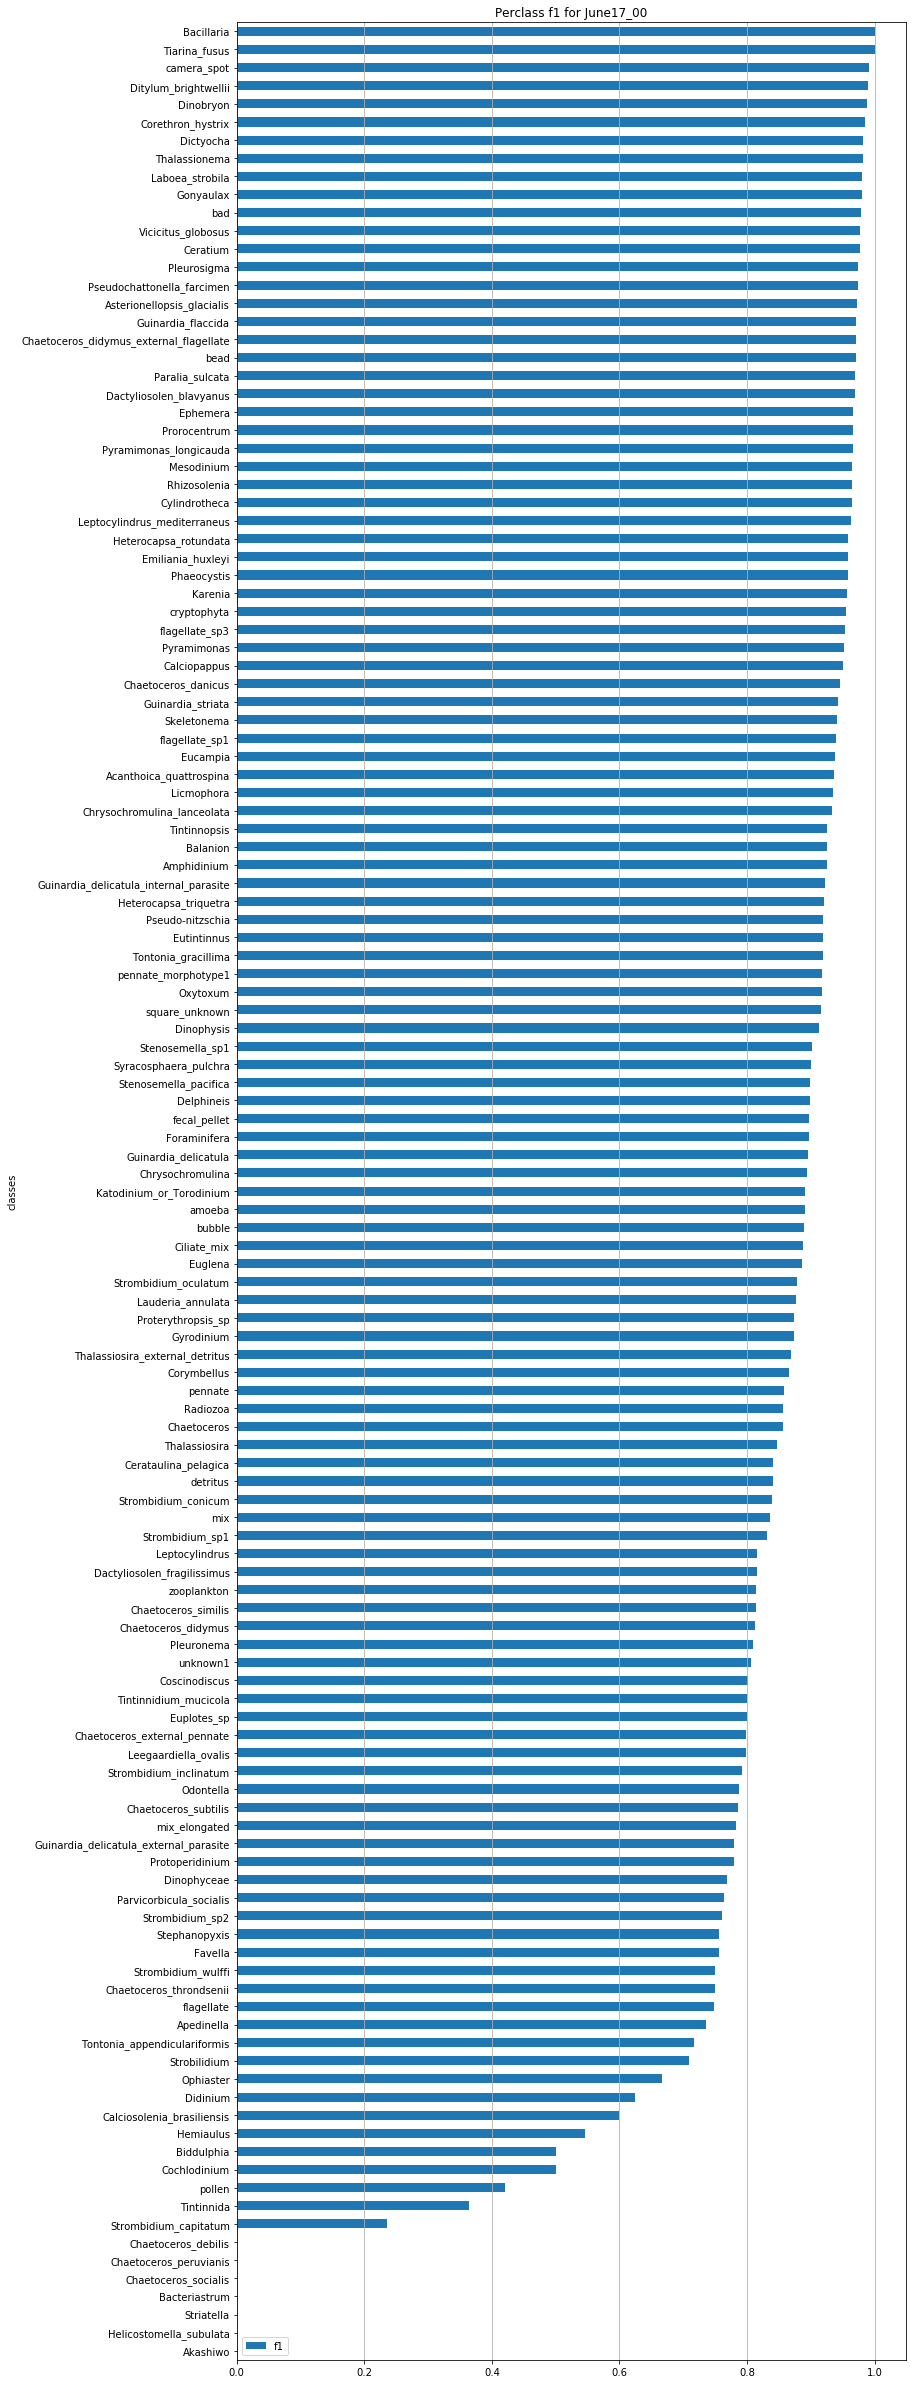

In [2]:
cos = reload(cos)
epoch = cos.Epoch('output/2018-06-17_8020/June17_00/best_epoch.dict')
epoch.perclass_barplot(end=None)

In [69]:
cos = reload(cos)
epoch = cos.Epoch('output/2018-06-17_8020/June17_00/best_epoch.dict')
df_ep = epoch.pairwise_df(skip_empties=True, skip_correct=True)
display(df_ep)
#df_ep.index

count  \
Input                      Output                                   
Acanthoica_quattrospina    Apedinella                           1   
                           Asterionellopsis_glacialis           1   
                           Chaetoceros                          1   
                           Chrysochromulina                     1   
                           flagellate                           7   
Akashiwo                   Gonyaulax                            1   
Amphidinium                Dinophyceae                          2   
                           Gyrodinium                           3   
                           Katodinium_or_Torodinium             4   
                           Oxytoxum                             2   
Apedinella                 Asterionellopsis_glacialis           1   
                           Chaetoceros_didymus                  1   
                           Dinophyceae                          1   
                           Pyramimonas                          1   
                           flagellate                           6   
Asterionellopsis_glacialis Cylindrotheca                        1   
                           Heterocapsa_rotundata                2   
                           Pyramimonas                          1   
                           Pyramimonas_longicauda               1   
                           Thalassiosira_external_detritus      1   
                           bead                                 1   
                           flagellate                           1   
                           mix_elongated                        1   
                           square_unknown                       1   
Bacteriastrum              Corethron_hystrix                    1   
Balanion                   Ciliate_mix                         23   
                           Corethron_hystrix                    1   
                           Corymbellus                          1   
                           Dinobryon                            1   
                           Gyrodinium                           1   
...                                                           ...   
pennate                    Euglena                              1   
                           Guinardia_striata                    1   
                           Katodinium_or_Torodinium             3   
                           Leptocylindrus                       5   
                           Pleurosigma                         11   
                           Prorocentrum                         1   
                           Pseudo-nitzschia                    35   
                           Pyramimonas                          1   
                           Rhizosolenia                         2   
                           Skeletonema                          2   
                           Thalassionema                        8   
                           Thalassiosira                        3   
                           cryptophyta                          1   
                           detritus                             2   
                           flagellate                           1   
                           flagellate_sp3                       1   
                           mix_elongated                       34   
                           square_unknown                       2   
pennate_morphotype1        Ephemera                             5   
                           Guinardia_flaccida                   3   
pollen                     Corymbellus                          1   
                           Dinophyceae                          1   
                           Heterocapsa_triquetra                1   
                           Thalassiosira_external_detritus      3   
square_unknown             detritus                             2   
unknown1                   Chaetoceros                    

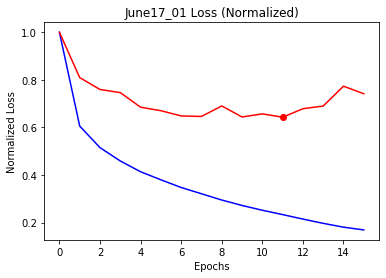

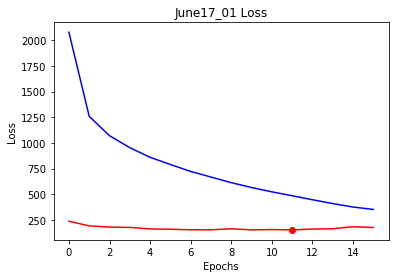

In [20]:
run = cos.Run('output/2018-06-17_8020/June17_01/evaluation_records.lod')
run.plot_loss()
run.plot_loss(normalize=False)


129
[35, 118, 50, 119, 28, 11, 49, 82, 50, 33]
Series: June17_00, Epoch: 8
Accuracy: 90.69%
F1 Score: 0.9065


/home/sbatchelder/.conda/envs/dataproc/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


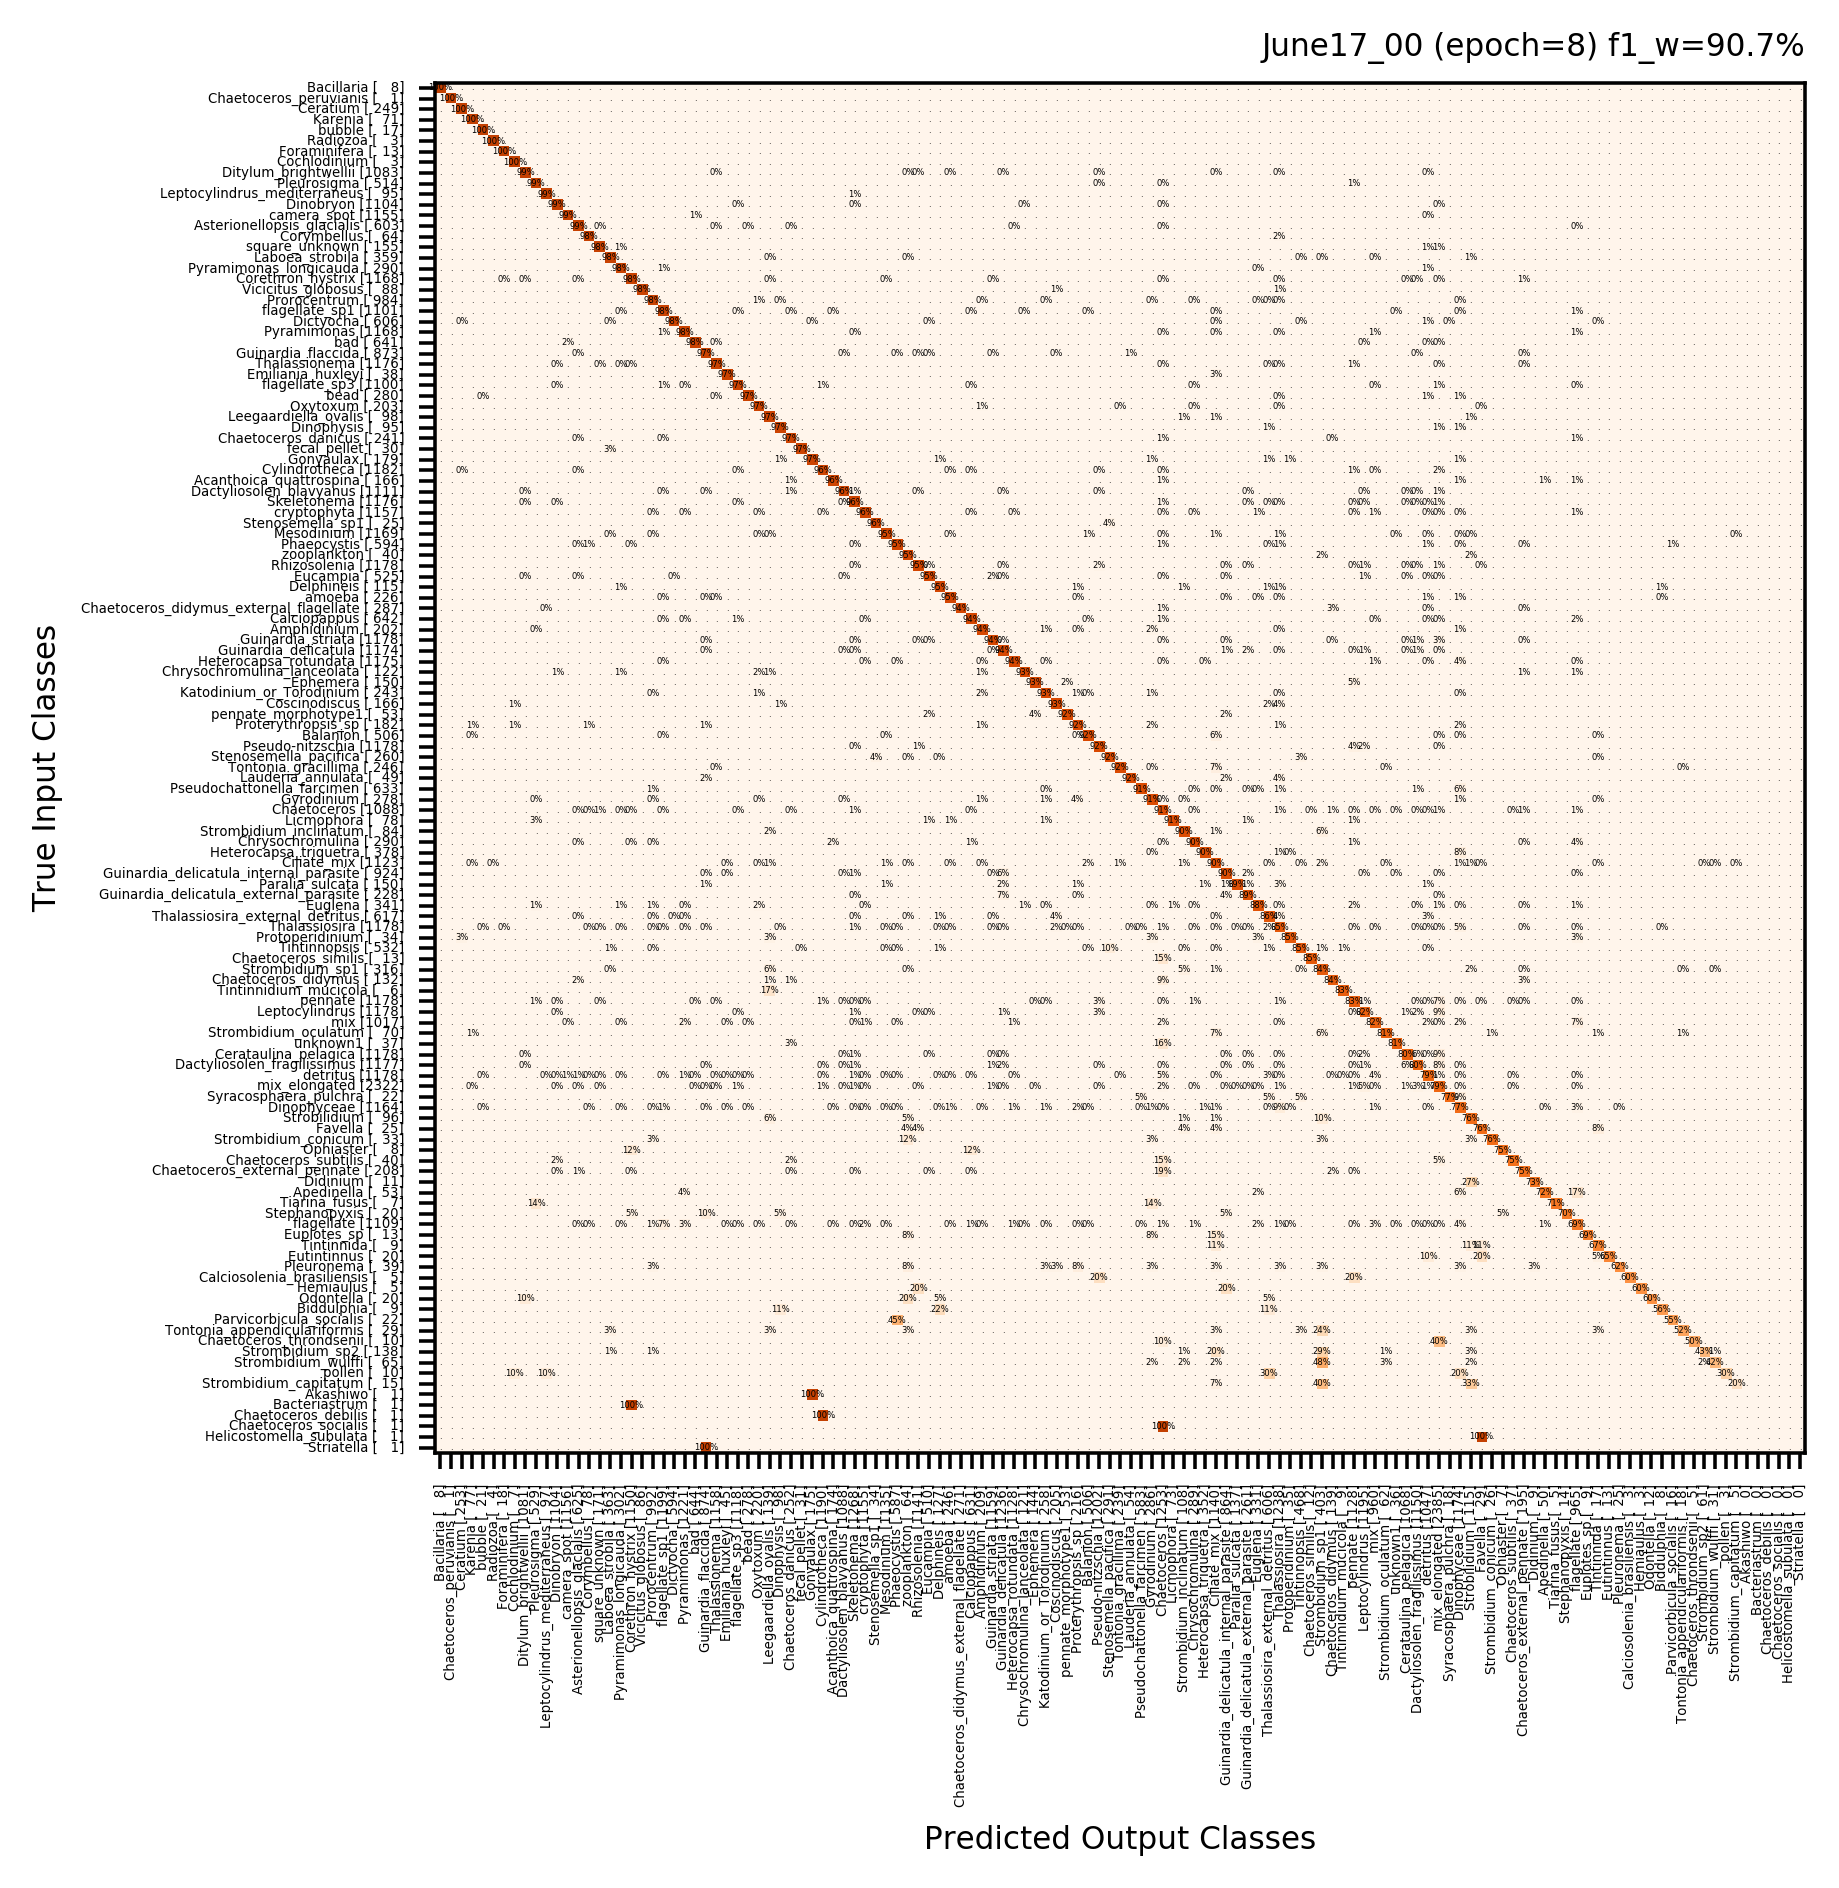

In [4]:
#be = Epoch('output/2018-06-17_8020_nonorm/June17_00/best_epoch.dict')
be = run.best_epoch
print(len(be.classes))
print(be.true_inputs[:10])
print('Run: {}, Epoch: {}'.format(be.name, be.epoch_num))
print('Accuracy: {:.2f}%'.format(100*be.accuracy))
print('F1 Score: {:.4}'.format(be.f1_weighted))
be.plot_confusion_matrix()

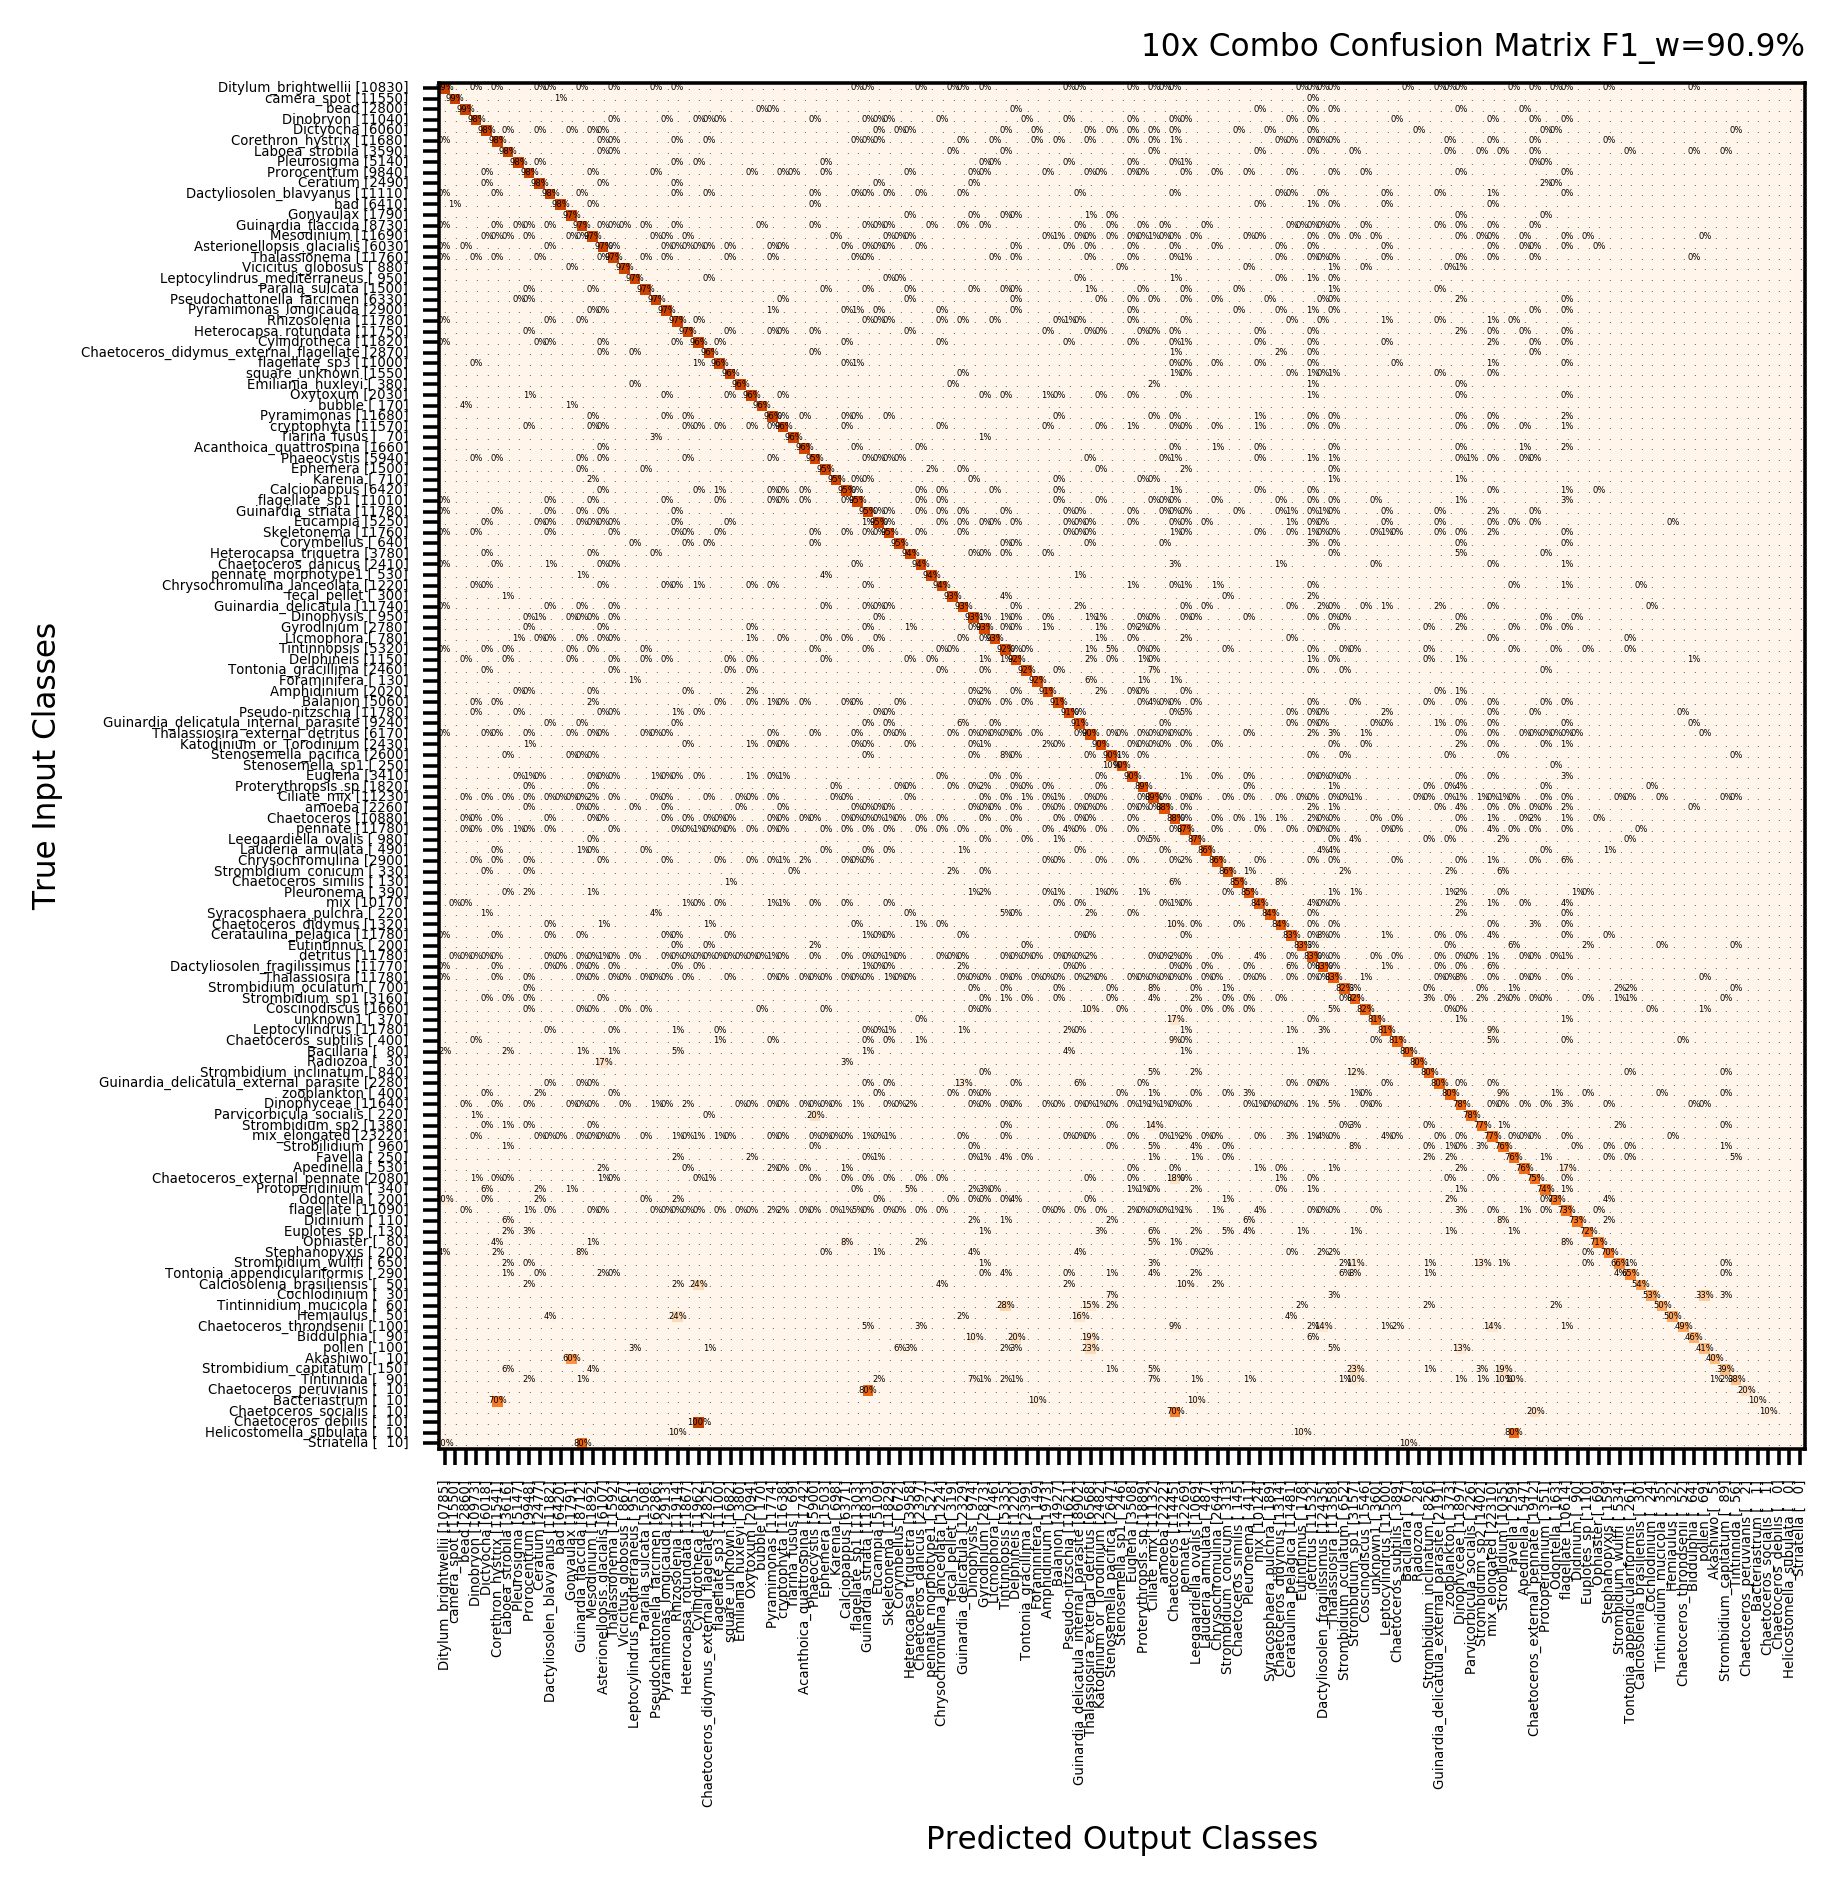

In [5]:
# Combo Epoch
best_epochs = ['output/2018-06-17_8020/June17_0{}/best_epoch.dict'.format(x) for x in range(10)]
combo = cos.ComboEpoch(best_epochs)
combo.plot_confusion_matrix()  # separate module to make this interactive

/home/sbatchelder/.conda/envs/dataproc/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sbatchelder/.conda/envs/dataproc/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sbatchelder/.conda/envs/dataproc/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sbatchelder/.conda/envs/dataproc/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec

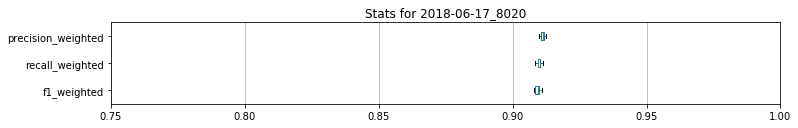

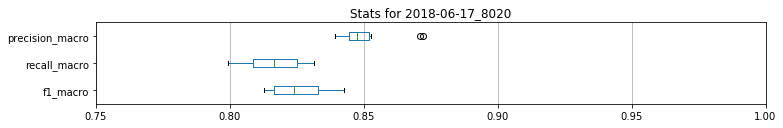

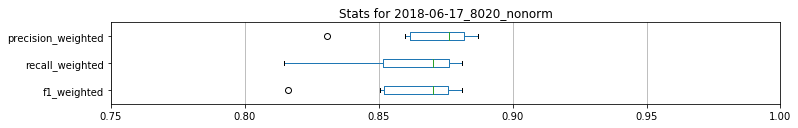

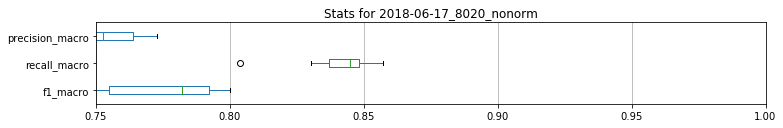

In [18]:
# TODO: Series boxplot plotting!
cos = reload(cos)
series1 = cos.Series_BestOf('output/2018-06-17_8020')
series1.boxplot('weighted')
series1.boxplot('macro')

series2 = cos.Series_BestOf('output/2018-06-17_8020_nonorm')
series2.boxplot('weighted')
series2.boxplot('macro')

In [75]:
cos = reload(cos)
series = cos.Series_BestOf('output/2018-06-17_8020')

[print('{} f1_w={:.1f}% f1_m={:.1f}% loss={}'.format(be.name, 100*be.f1_weighted, 100*be.f1_macro, be.eval_loss)) for be in series.best_epochs]
bebe = sorted(series.best_epochs,key=lambda be: be.eval_loss)[0]
print('\n',bebe.name,'is the best one')

/home/sbatchelder/.conda/envs/dataproc/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


June17_07 f1_w=91.0% f1_m=82.8% loss=151.60882729291916
June17_03 f1_w=90.8% f1_m=84.3% loss=152.6606568172574
June17_08 f1_w=90.9% f1_m=81.9% loss=149.59344711899757
June17_02 f1_w=91.1% f1_m=83.0% loss=148.86490265280008
June17_05 f1_w=90.9% f1_m=81.3% loss=154.85961421579123
June17_09 f1_w=91.0% f1_m=82.0% loss=151.7535901889205
June17_04 f1_w=90.9% f1_m=81.5% loss=151.8664909377694
June17_01 f1_w=91.1% f1_m=83.4% loss=151.90786264836788
June17_06 f1_w=90.8% f1_m=83.8% loss=152.5415187999606
June17_00 f1_w=90.8% f1_m=81.5% loss=152.343716673553

 June17_02 is the best one


/home/sbatchelder/.conda/envs/dataproc/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


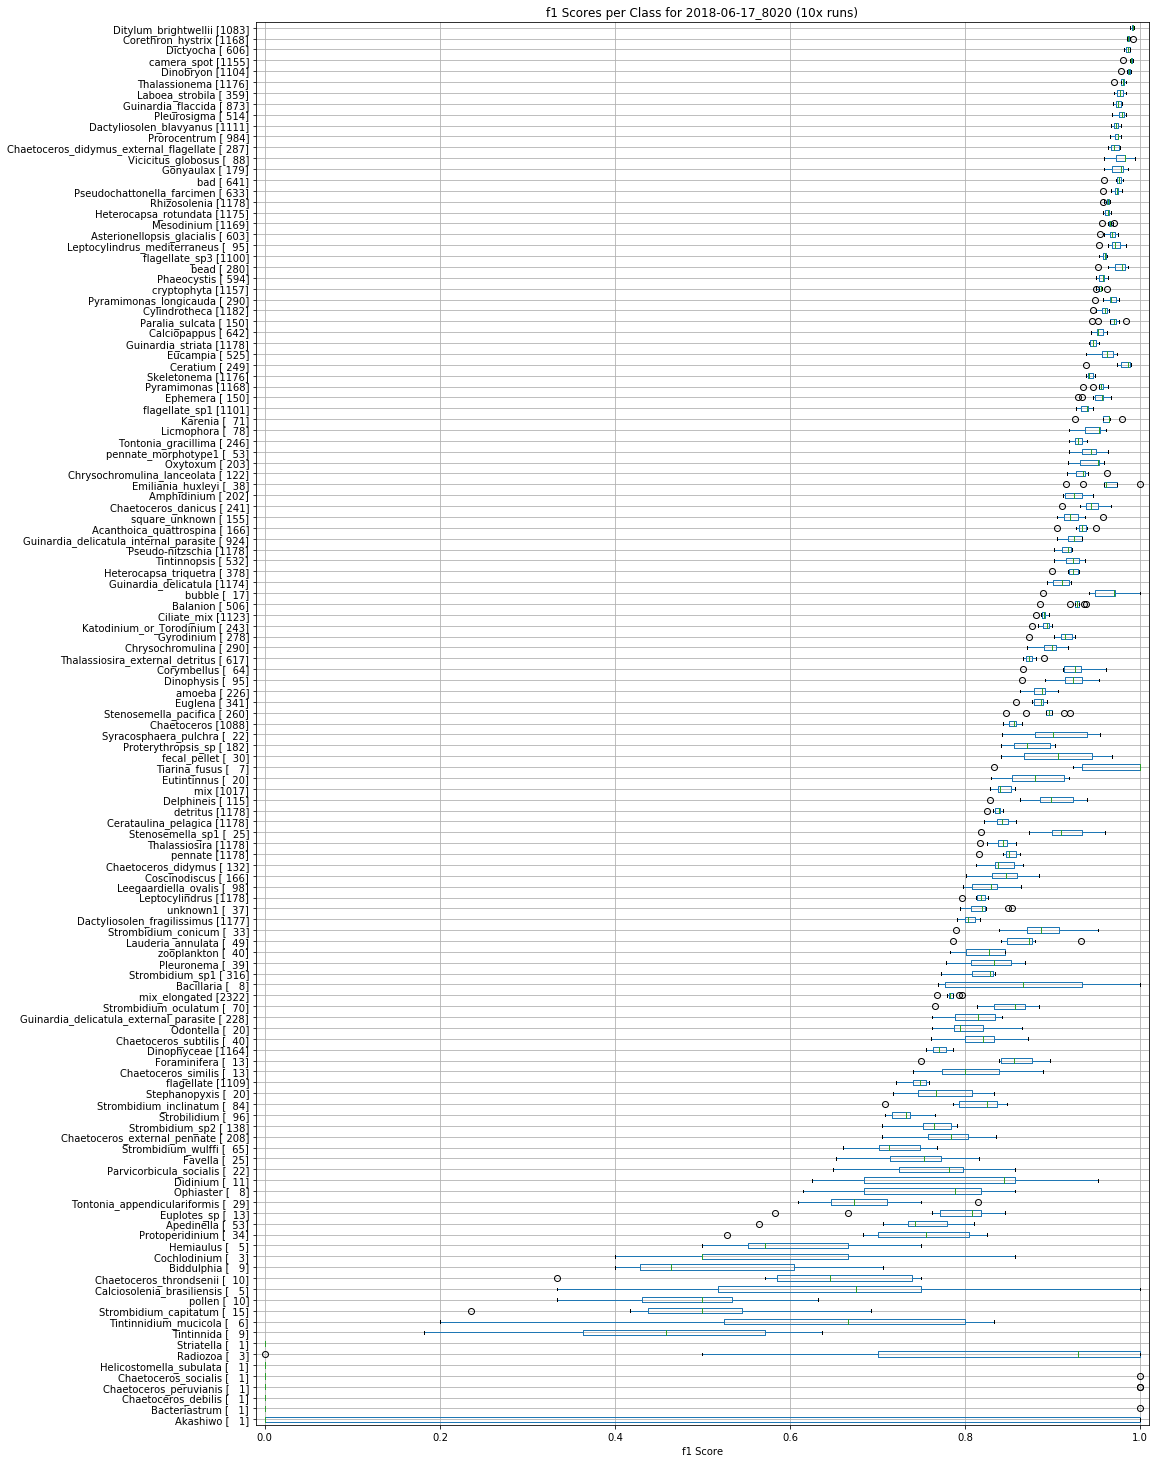

In [7]:
from statistics import stdev, mean
cos = reload(cos)
series = cos.Series('output/2018-06-17_8020', best_epochs_only=True)

series.perclass_boxplot(stat='f1', sort_by=[mean,min,max,stdev,'count'][1])

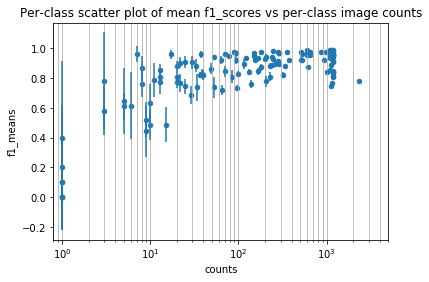

In [101]:

counts = series.best_epochs[0].count_perclass
f1_means = [mean([be.f1_perclass[i] for be in series.best_epochs]) for i,c in enumerate(series.classes)]
errs = [stdev([be.f1_perclass[i] for be in series.best_epochs]) for i,c in enumerate(series.classes)]
df_xy = pd.DataFrame(dict(counts=counts,f1_means=f1_means,errs=errs, classes=series.classes))
df_xy

ax=df_xy.plot.scatter('counts','f1_means', yerr='errs', logx=True, 
                      title='Per-class scatter plot of mean f1_scores vs per-class image counts', 
                      figsize=[10,])
ax.set_xlim(0.8, 5000)
ax.grid(True, which='both', axis='x')


In [71]:
cos = reload(cos)
series = cos.Series('output/2018-06-17_8020', best_epochs_only=True)

combo = series.combo_epoch()
df10 = combo.pairwise_df(skip_correct=True,
                       skip_empties=True,
                       keep_dupes=[10])
df10


count  \
Input                                  Output                                   
flagellate                             flagellate_sp1                      33   
mix_elongated                          Dactyliosolen_fragilissimus         29   
Dactyliosolen_fragilissimus            mix_elongated                       24   
Cerataulina_pelagica                   Dactyliosolen_fragilissimus         24   
Thalassiosira                          Dinophyceae                         19   
Leptocylindrus                         mix_elongated                       16   
flagellate                             Pyramimonas                         15   
                                       mix                                 15   
mix_elongated                          Leptocylindrus                      15   
                                       Cerataulina_pelagica                14   
                                       flagellate_sp3                      13   
Guinardia_delicatula_internal_parasite Guinardia_delicatula                12   
mix_elongated                          Cylindrotheca                       12   
                                       pennate                             11   
Pseudo-nitzschia                       Leptocylindrus                      10   
mix_elongated                          Guinardia_striata                   10   
mix                                    flagellate                          10   
                                       detritus                            10   
Leptocylindrus                         Dactyliosolen_fragilissimus          9   
Dactyliosolen_fragilissimus            Cerataulina_pelagica                 9   
Dinophyceae                            flagellate                           8   
detritus                               Thalassiosira_external_detritus      8   
Dinophyceae                            Thalassiosira                        8   
detritus                               mix                                  8   
Tintinnopsis                           Stenosemella_pacifica                7   
pennate                                Pseudo-nitzschia                     7   
Calciopappus                           flagellate_sp3                       7   
flagellate_sp3                         flagellate_sp1                       7   
mix_elongated                          Chaetoceros                          6   
Thalassiosira_external_detritus        detritus                             6   
...                                                                       ...   
Strombidium_sp2                        Strombidium_sp1                      1   
                                       Strombidium_wulffi                   1   
Thalassionema                          Corethron_hystrix                    1   
                                       Thalassiosira_external_detritus      1   
Thalassiosira                          Acanthoica_quattrospina              1   
Pyramimonas_longicauda                 detritus                             1   
Prorocentrum                           Oxytoxum                             1   
Eucampia                               Guinardia_striata                    1   
Laboea_strobila                        Tintinnopsis                         1   
Eucampia                               Leptocylindrus                       1   
Euglena                                Pseudochattonella_farcimen           1   
                                       flagellate                           1   
Gonyaulax                              Thalassiosira_external_detritus      1   
Guinardia_delicatula                   Thalassiosira                        1   
Guinardia_striata                      Guinardia_flaccida                   1   
                                       mix_elongated                        1   
Gyrodinium                             Katodinium_or_Torodinium             1   
Heterocapsa_triquetra 

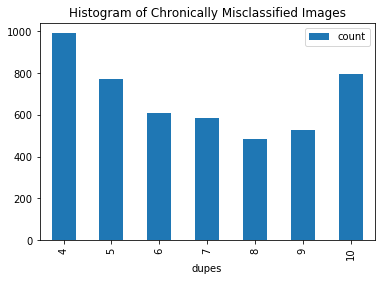

In [73]:
combo.naughty_dupes(minimum=4, plot=True)

/home/sbatchelder/.conda/envs/dataproc/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sbatchelder/.conda/envs/dataproc/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


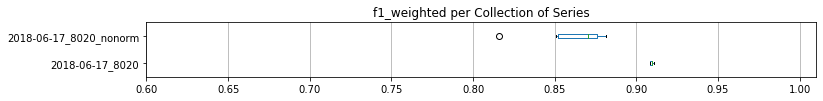

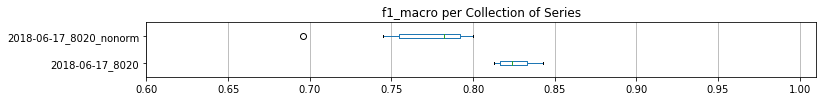

In [74]:
# TODO: Collection boxplot plotting!
cos = reload(cos)
coll = cos.Collection(['2018-06-17_8020','2018-06-17_8020_nonorm'], best_epochs_only=True)
coll.boxplot('f1_weighted', start=0.6)
coll.boxplot('f1_macro', start=0.6)